# BMI 565: Bioinformatics Programming & Scripting

#### (C) 2015 Michael Mooney (mooneymi@ohsu.edu)

## Week 8 - Statistics in Python

1. Pandas for Data Analysis
    - Labeled data structures
    - Plotting with `Pandas`
2. Statistics
    - Descriptive Statistics
    - Linear regression

#### Requirements

- Python 2.7
- `numpy` module
- `scipy` module
- `pandas` module
- `statsmodels` module
- Data Files
    - `serotonin_data.txt`

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

## `Pandas` Module

The `pandas` module contains a lot of great functionality for working with large data sets. `Pandas` is built on top of `Numpy` and works well with numerous other Python packages for scientific computing.

[http://pandas.pydata.org/pandas-docs/stable/index.html](http://pandas.pydata.org/pandas-docs/stable/index.html)


Example data ('serotonin.txt') from the lava R package: [http://cran.r-project.org/web/packages/lava/index.html](http://cran.r-project.org/web/packages/lava/index.html)

### Labeled Data Structures

#### The `DataFrame` data structure

In [4]:
df1 = pd.DataFrame(np.random.rand(5,5), index=[1,2,3,4,5], columns=['A','B','C','D','E'])
df1.head(4)

,A,B,C,D,E
1,0.097948,0.677905,0.555590,0.917614,0.968842
2,0.124233,0.479873,0.327393,0.989692,0.211414
3,0.627876,0.876419,0.201664,0.225983,0.100255
4,0.712480,0.144597,0.158907,0.172221,0.234705


#### The `Series` data structure

In [5]:
s1 = pd.Series(0, index=df1.index)
s1

1    0
2    0
3    0
4    0
5    0
dtype: int64

In [3]:
## Read data into a pandas data frame
## Default options assume comma as delimiter and a header line with column names
dat = pd.read_csv('serotonin_data.txt')

In [7]:
## Check the dimensions of the data frame
dat.shape

(250, 20)

In [8]:
## Get the column names
list(dat.columns.values)

['par',
 'sfc',
 'aci',
 'pci',
 'u1',
 'cau',
 'th',
 'put',
 'mid',
 'u2',
 'mem',
 'u',
 'age',
 'gene1',
 'gene2',
 'eta',
 'day',
 'depr',
 'T',
 'status']

In [9]:
## View the first few rows
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,mem,u,age,gene1,gene2,eta,day,depr,T,status
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,49,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,36,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,169,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,196,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,64,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1


In [10]:
## Use slice notation to get a subset of rows
dat[0:5]

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,mem,u,age,gene1,gene2,eta,day,depr,T,status
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,49,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,36,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,169,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,196,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,64,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1


In [11]:
## Select a single column (use a list to get multiple columns)
dat[['par', 'sfc']][:5]

,par,sfc
0,1.541845,1.639296
1,1.285776,1.314337
2,1.633392,1.731265
3,1.971132,1.735649
4,1.376904,1.423676


In [19]:
np.mean(dat['par'])

1.2908740433900916

In [13]:
dat.iloc[0:5,0:5]

,par,sfc,aci,pci,u1
0,1.541845,1.639296,1.631768,1.436017,3.053231
1,1.285776,1.314337,1.224379,1.154257,0.536178
2,1.633392,1.731265,1.588976,1.580385,3.881156
3,1.971132,1.735649,1.768737,1.852557,4.071059
4,1.376904,1.423676,1.461504,1.169873,1.043610


In [14]:
## Subsetting the data structure based on a condition
gene_idx = (dat['gene1'] == 1) & (dat['gene2'] == 1)
gene_idx

0       True
1       True
2       True
3      False
4       True
5       True
6      False
7      False
8       True
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
220    False
221     True
222     True
223     True
224    False
225     True
226    False
227     True
228    False
229     True
230    False
231    False
232    False
233     True
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243     True
244    False
245    False
246    False
247    False
248    False
249    False
dtype: bool

In [15]:
dat[gene_idx][1:5]

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,mem,u,age,gene1,gene2,eta,day,depr,T,status
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,36,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,169,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,64,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1
5,0.806983,1.058278,1.115488,0.651795,-1.917271,0.845913,0.901128,1.074159,1.008709,-0.411856,144,-0.254622,1.341796,1,1,0.000730,257,1,30.000000,0


In [5]:
## Get a table of variable values
gene1_counts = dat['gene1'].value_counts()
gene1_counts

0    133
1    117
dtype: int64

### Plotting with `Pandas`

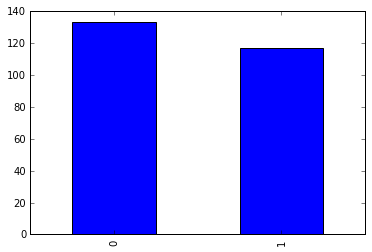

In [20]:
gene1_counts.plot(kind="bar")

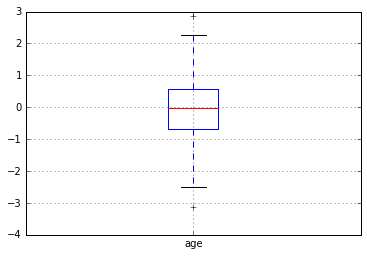

In [21]:
x = dat.boxplot(column='age', return_type='axes')
plt.savefig('boxplot1.pdf')

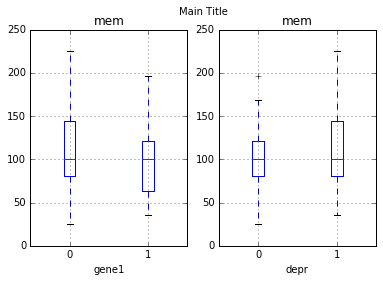

In [21]:
## Test
#fig = plt.figure()
fig, axes = plt.subplots(1,2)
dat.boxplot(column='mem', by='gene1', ax=axes[0], return_type='axes')
dat.boxplot(column='mem', by='depr', ax=axes[1], return_type='axes')
fig.texts = []
fig.texts = [fig.suptitle("Main Title")]
fig.savefig("testfig.png", format='png')

In [22]:
plt.close()

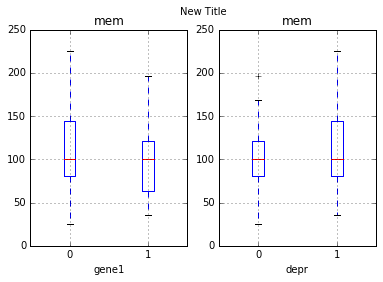

In [24]:
fig, axes = plt.subplots(1,2)
dat.boxplot(column='mem', by='gene1', ax=axes[0], return_type='axes')
dat.boxplot(column='mem', by='depr', ax=axes[1], return_type='axes')
fig.suptitle("New Title")

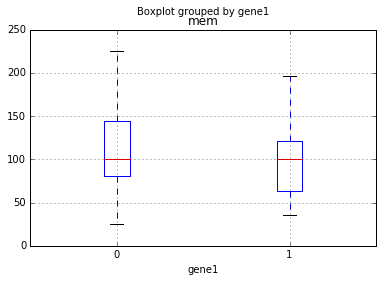

In [22]:
dat.boxplot(column='mem', by='gene1')

In [ ]:
help(dat.boxplot)

In [25]:
dat['mem'].median()

100.0

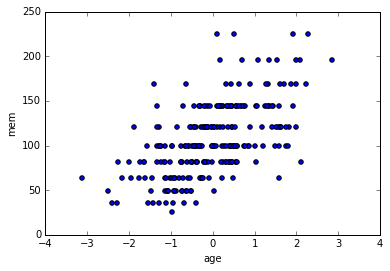

In [26]:
dat.plot(x='age', y='mem', kind="scatter")

In [5]:
## Create a new column
dat['age_cat'] = pd.Series(0, index=dat.index)

In [28]:
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,u,age,gene1,gene2,eta,day,depr,T,status,age_cat
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1,0
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0,0
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0,0
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1,0


In [7]:
dat['age_cat'][dat['age'] > 0] = 1

/Users/mooneymi/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [8]:
dat.loc[dat['age'] > 0, 'age_cat'] = 1

In [9]:
dat.head()

,par,sfc,aci,pci,u1,cau,th,put,mid,u2,...,u,age,gene1,gene2,eta,day,depr,T,status,age_cat
0,1.541845,1.639296,1.631768,1.436017,3.053231,0.941444,1.062079,0.988974,0.849440,0.452027,...,1.918266,-1.137870,1,1,-0.425573,30,0,1.019006,1,0
1,1.285776,1.314337,1.224379,1.154257,0.536178,1.018560,0.789055,0.903791,0.666955,-0.937675,...,-0.575754,-0.951810,1,1,-2.959047,246,1,30.000000,0,0
2,1.633392,1.731265,1.588976,1.580385,3.881156,0.965680,0.741293,0.389869,0.830224,-7.700945,...,4.751934,1.619259,1,1,4.244131,243,1,30.000000,0,1
3,1.971132,1.735649,1.768737,1.852557,4.071059,0.944994,0.643423,0.706459,0.822270,-4.530420,...,3.860327,0.167814,0,0,3.280688,335,0,30.000000,0,1
4,1.376904,1.423676,1.461504,1.169873,1.043610,0.778490,0.959439,0.968423,0.886591,-1.161456,...,0.974215,-0.908178,1,1,-1.082029,215,0,4.835404,1,0


In [32]:
dat['gene1'].value_counts()

0    133
1    117
dtype: int64

In [33]:
dat.groupby(['gene1','gene2']).size()

gene1  gene2
0      0        60
       1        73
1      0        59
       1        58
dtype: int64

## Statistics in Python

The `statsmodels` package contains functions and classes for data exploration and many different statistical procedures (modeling, hypothesis testing). `Pandas` and `Scipy` also have statistics modules.

[http://statsmodels.sourceforge.net/stable/index.html](http://statsmodels.sourceforge.net/stable/index.html)

[http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics)

[http://docs.scipy.org/doc/scipy-0.13.0/reference/stats.html](http://docs.scipy.org/doc/scipy-0.13.0/reference/stats.html)

### Descriptive Statistics

In [34]:
dat['age'].describe()

count    250.000000
mean      -0.009506
std        1.036330
min       -3.119118
25%       -0.676994
50%       -0.033606
75%        0.561708
max        2.861592
Name: age, dtype: float64

In [37]:
from scipy import stats
stats.describe(dat['age'])

DescribeResult(nobs=250, minmax=(-3.1191175148780097, 2.8615918114088901), mean=-0.0095057436157085923, variance=1.0739808473043826, skewness=0.05622816799215876, kurtosis=-0.11090770812166584)

In [38]:
import statsmodels.api as sma
desc = sma.stats.DescrStatsW(dat[['age','mem']])
desc.mean

array([ -9.50574362e-03,   1.07140000e+02])

In [40]:
## Create a correlation matrix
#np.corrcoef(dat[['age','mem']], rowvar=0)
desc.corrcoef

array([[ 1.        ,  0.59016791],
       [ 0.59016791,  1.        ]])

In [41]:
## Calculate a T-test to compare means
sma.stats.ttest_ind(dat['mem'][dat['gene1']==1], dat['mem'][dat['gene1']==0])

(-2.9567022934300766, 0.0034094451435307434, 248.0)

In [42]:
help(sma.stats.ttest_ind)

Help on function ttest_ind in module statsmodels.stats.weightstats:

ttest_ind(x1, x2, alternative='two-sided', usevar='pooled', weights=(None, None), value=0)
    ttest independent sample
    
    convenience function that uses the classes and throws away the intermediate
    results,
    compared to scipy stats: drops axis option, adds alternative, usevar, and
    weights option
    
    Parameters
    ----------
    x1, x2 : array_like, 1-D or 2-D
        two independent samples, see notes for 2-D case
    alternative : string
        The alternative hypothesis, H1, has to be one of the following
    
           'two-sided': H1: difference in means not equal to value (default)
           'larger' :   H1: difference in means larger than value
           'smaller' :  H1: difference in means smaller than value
    
    usevar : string, 'pooled' or 'unequal'
        If ``pooled``, then the standard deviation of the samples is assumed to be
        the same. If ``unequal``, then Welsh tt

In [ ]:
dat['mem'][dat['gene1']==1].mean()

In [ ]:
np.min(dat['mem'])

In [ ]:
dat['mem'][dat['gene1']==0].mean()

In [48]:
dat['age']

0     -1.137870
1     -0.951810
2      1.619259
3      0.167814
4     -0.908178
5      1.341796
6      0.022043
7     -0.207005
8     -1.119757
9     -1.027899
10     0.314034
11    -0.968203
12    -0.285030
13    -0.280856
14    -0.120301
15     1.238739
16    -1.540927
17    -0.217596
18    -1.173859
19     0.390681
20    -0.028506
21    -0.726328
22     0.522556
23    -0.886584
24    -0.162438
25     1.826271
26     1.755697
27     2.270081
28     0.466427
29    -0.962545
         ...   
220   -0.541365
221   -0.214115
222    0.567519
223    0.448030
224    1.587338
225   -0.681541
226   -1.078777
227    1.421781
228    0.111792
229    0.452321
230    0.882265
231   -0.546460
232    0.434750
233   -0.913803
234    0.019253
235    0.630685
236   -0.520616
237   -0.178219
238    1.494796
239   -0.454711
240    0.193339
241   -0.327339
242   -1.323815
243    0.366252
244   -1.645271
245    0.118459
246    0.334439
247   -1.128518
248    0.318447
249   -0.714159
Name: age, dtype: float6

### Linear Regression

In [43]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='mem ~ age', data=dat)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                    mem   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 19 Nov 2015   Prob (F-statistic):           7.45e-25
Time:                        09:36:37   Log-Likelihood:                -1228.2
No. Observations:                 250   AIC:                             2460.
Df Residuals:                     248   BIC:                             2467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    107.3611      2.090     51.372      0.0

In [44]:
## The regression fit parameters
res.params

Intercept    107.361123
age           23.262082
dtype: float64

In [45]:
res.params[0]

107.36112338651381

## In-Class Exercises

In [ ]:
## Exercise 1.
## Create a new categorical variable in the serotonin data frame 
## called 'highmem'. Set the variable = 1 for subjects with a 'mem' 
## value > 100, otherwise 0. Split the data into two different 
## data frames based on the value of 'highmem'. Create boxplots 
## of 'age' for both data frames, and identify the mean, min, 
## max for each.
##


## References

1. [http://docs.scipy.org/doc/numpy/reference/index.html](http://docs.scipy.org/doc/numpy/reference/index.html)
2. [http://pandas.pydata.org/pandas-docs/stable/](http://pandas.pydata.org/pandas-docs/stable/)
3. [http://statsmodels.sourceforge.net/stable/index.html](http://statsmodels.sourceforge.net/stable/index.html)

#### Last Updated: 16-Nov-2015¶